In [2]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydotplus
import h5py

import tensorflow
import keras

print('scipy ' + scipy.__version__ );
print('numpy ' + numpy.__version__ );
print('matplotlib ' + matplotlib.__version__ );
print('pandas ' + pandas.__version__ );
print('sklearn ' + sklearn.__version__ );
print('h5py ' + h5py.__version__ );

print('tensorflow ' + tensorflow.__version__ );
print('keras ' + keras.__version__ );

scipy 1.0.1
numpy 1.14.2
matplotlib 2.2.2
pandas 0.22.0
sklearn 0.19.1
h5py 2.7.1
tensorflow 1.2.1
keras 2.1.5


In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.6869 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.3505 - acc: 0.9013
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3028 - acc: 0.9142
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.2743 - acc: 0.9220
Epoch 5/5
10000/10000 [==============================] - 0s 33us/step
loss_and_metrics : [0.23972345739603043, 0.93149999999999999]


Using TensorFlow backend.


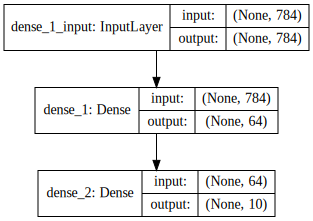

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

%matplotlib inline

SVG(model_to_dot(model,  show_shapes=True).create(prog='dot', format='svg'))

In [10]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(3)

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'resrc/test/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'resrc/test/handwriting_shape/test',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

Using TensorFlow backend.


Found 45 images belonging to 3 classes.


NameError: name 'test_generator' is not defined

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np


np.random.seed(5)

data_aug_gen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=10,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.7,
                                 zoom_range=[0.9, 2.2],
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 fill_mode='nearest')

img = load_img('resrc/test/handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0

for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='resrc/test/preview/triangles', save_prefix='tri', save_format='png') : 
    i +=  1
    if i > 50 :
        print('generated done!')
        break
        

done


In [10]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'resrc/test/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'resrc/test/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/200
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2001 - acc: 0.9153 - val_loss: 2.3842e-06 - val_acc: 1.0000
Epoch 2/200
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0388 - acc: 0.9856 - val_loss: 1.5037e-05 - val_acc: 1.0000
Epoch 3/200
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0314 - acc: 0.9891 - val_loss: 1.9083e-05 - val_acc: 1.0000
Epoch 4/200
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0257 - acc: 0.9920 - val_loss: 2.4558e-06 - val_acc: 1.0000
Epoch 5/200
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0203 - acc: 0.9931 - val_loss: 2.0663e-07 - val_acc: 1.0000
Epoch 6/200
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0192 - acc: 0.9938 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 7/200
1500/1500 [==============================] - 46s 31ms/step - l

1500/1500 [==============================] - 46s 30ms/step - loss: 0.0136 - acc: 0.9991 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 115/200
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0036 - acc: 0.9998 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 116/200
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0324 - acc: 0.9978 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 117/200
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0246 - acc: 0.9978 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 118/200
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0652 - acc: 0.9958 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 119/200
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0398 - acc: 0.9973 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 120/200
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0272 - acc: 0.9976 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 121/200

In [15]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'resrc/test/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'resrc/test/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 10,
        epochs=10,
        validation_data=test_generator,
        validation_steps=5)

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/10
150/150 [==============================] - 5s 35ms/step - loss: 0.8038 - acc: 0.6267 - val_loss: 0.4840 - val_acc: 0.7333
Epoch 2/10
150/150 [==============================] - 5s 31ms/step - loss: 0.3043 - acc: 0.9000 - val_loss: 0.1239 - val_acc: 1.0000
Epoch 3/10
150/150 [==============================] - 5s 32ms/step - loss: 0.1853 - acc: 0.9333 - val_loss: 0.1407 - val_acc: 0.9333
Epoch 4/10
150/150 [==============================] - 5s 32ms/step - loss: 0.1289 - acc: 0.9533 - val_loss: 0.0201 - val_acc: 1.0000
Epoch 5/10
150/150 [==============================] - 5s 31ms/step - loss: 0.1283 - acc: 0.9667 - val_loss: 0.0198 - val_acc: 1.0000
Epoch 6/10
150/150 [==============================] - 5s 31ms/step - loss: 0.0786 - acc: 0.9711 - val_loss: 0.0111 - val_acc: 1.0000
Epoch 7/10
150/150 [==============================] - 5s 32ms/step - loss: 0.0624 - acc: 0.9844 - val_loss: 0.0019 - val_a